<a href="https://colab.research.google.com/github/kavi032003/kavi/blob/main/notebookdf2a2c64cf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
clmentbisaillon_fake_and_real_news_dataset_path = kagglehub.dataset_download('clmentbisaillon/fake-and-real-news-dataset')

print('Data source import complete.')


Data source import complete.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import joblib



In [3]:
df_fake = pd.read_csv(r'/kaggle/input/fake-and-real-news-dataset/Fake.csv')
df_real = pd.read_csv(r'/kaggle/input/fake-and-real-news-dataset/True.csv')


In [4]:
# Add labels
df_fake['label'] = 0
df_real['label'] = 1

# Combine datasets
df = pd.concat([df_fake, df_real]).reset_index(drop=True)

# Check data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Combine title and text into a single feature
df['text_data'] = df['title'] + " " + df['text']

# Check the distribution
df['label'].value_counts()

,count
label,
0,23481
1,21417


In [5]:
df.head()

,title,text,subject,date,label,text_data
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0,Ben Stein Calls Out 9th Circuit Court: Committ...
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1,Trump drops Steve Bannon from National Securit...
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1,Puerto Rico expects U.S. to lift Jones Act shi...
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",0,OOPS: Trump Just Accidentally Confirmed He Le...
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",1,Donald Trump heads for Scotland to reopen a go...


In [6]:
print(f"Dataset shape: {df.shape}")
print(df['label'].value_counts())

# Optional: Check for missing values
print(df.isnull().sum())

Dataset shape: (44898, 6)
label
0    23481
1    21417
Name: count, dtype: int64
title        0
text         0
subject      0
date         0
label        0
text_data    0
dtype: int64


In [7]:
X = df['text']  # or 'title' if you want short text
y = df['label']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y
)


In [9]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [10]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Save model and vectorizer
joblib.dump(model, 'fake_news_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [11]:
y_pred = model.predict(X_test_tfidf)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")
print(classification_report(y_test, y_pred))



Accuracy: 0.984966592427617

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4696
           1       0.98      0.99      0.98      4284

    accuracy                           0.98      8980
   macro avg       0.98      0.99      0.98      8980
weighted avg       0.98      0.98      0.98      8980



In [12]:
import time

# Simulate real-time predictions on 5 articles
for i in range(5):
    article = X_test.iloc[i]
    label = y_test.iloc[i]
    vec = vectorizer.transform([article])
    pred = model.predict(vec)[0]

    print(f"\nArticle {i+1}: {article[:200]}...")
    print(f"Prediction: {'Real' if pred else 'Fake'} | Actual: {'Real' if label else 'Fake'}")
    time.sleep(1)  # optional delay for effect


Article 1: MANILA (Reuters) - A Filipino accused by the United States of being an Islamic State supporter involved in a foiled plot to mount gun and bomb attacks in the heart of New York City is a hospital docto...
Prediction: Real | Actual: Real

Article 2: NEW YORK (Reuters) - More Republicans now think Democrat Hillary Clinton, rather than Donald Trump, will win the presidency, as their party’s candidate struggles with difficulties including allegation...
Prediction: Real | Actual: Real

Article 3: Donald Trump on Wednesday slammed what he described as  thugs  and  criminals  who clashed with police outside an Albuquerque campaign event, just hours after police in riot gear and mounted patrol un...
Prediction: Fake | Actual: Fake

Article 4: ASTANA (Reuters) - Syrian groups who choose to boycott the Russia-sponsored national congress next month risk being sidelined as the political process moves ahead, Russian negotiator Alexander Lavrent...
Prediction: Real | Actual: Real

Article

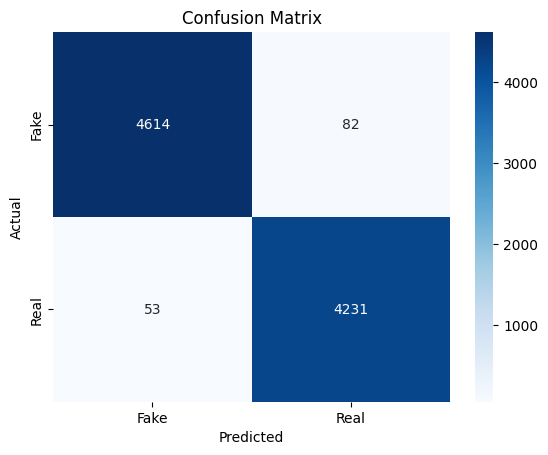

In [13]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [14]:
import pickle

# Save model
with open('fake_news_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Save vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)
